![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Pandas - Series


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [1]:
import pandas as pd
import numpy as np

## Pandas Series

We'll start analyzing "[The Group of Seven](https://en.wikipedia.org/wiki/Group_of_Seven)". Which is a political formed by Canada, France, Germany, Italy, Japan, the United Kingdom and the United States. We'll start by analyzing population, and for that, we'll use a `pandas.Series` object.

In [2]:
# In millions
g7_pop = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])

In [3]:
g7_pop

,0
0,35.467
1,63.951
2,80.940
3,60.665
4,127.061
5,64.511
6,318.523


In [6]:
print(g7_pop.dtype)

float64


Someone might not know we're representing population in millions of inhabitants. Series can have a `name`, to better document the purpose of the Series:

In [7]:
g7_pop.name = 'G7 Population in millions'

In [8]:
g7_pop

,G7 Population in millions
0,35.467
1,63.951
2,80.940
3,60.665
4,127.061
5,64.511
6,318.523


Series are pretty similar to numpy arrays:

In [9]:
g7_pop.dtype

dtype('float64')

In [10]:
g7_pop.values

array([ 35.467,  63.951,  80.94 ,  60.665, 127.061,  64.511, 318.523])

They're actually backed by numpy arrays:

In [11]:
type(g7_pop.values)

numpy.ndarray

And they _look_ like simple Python lists or Numpy Arrays. But they're actually more similar to Python `dict`s.

A Series has an `index`, that's similar to the automatic index assigned to Python's lists:

In [ ]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

In [12]:
g7_pop[0]

np.float64(35.467)

In [14]:
g7_pop[1]

np.float64(63.951)

In [15]:
g7_pop.index

RangeIndex(start=0, stop=7, step=1)

In [16]:
l = ['a', 'b', 'c']

But, in contrast to lists, we can explicitly define the index:

In [17]:
g7_pop.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [ ]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

Compare it with the [following table](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?usp=sharing):

<img width="350" src="https://user-images.githubusercontent.com/872296/38149656-b5ce9816-3431-11e8-88e4-195756e25355.png" />

We can say that Series look like "ordered dictionaries". We can actually create Series out of dictionaries:

In [18]:
pd.Series({
    'Canada': 35.467,
    'France': 63.951,
    'Germany': 80.94,
    'Italy': 60.665,
    'Japan': 127.061,
    'United Kingdom': 64.511,
    'United States': 318.523
}, name='G7 Population in millions')

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [19]:
pd.Series(
    [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    index=['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
    name='G7 Population in millions')

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


You can also create Series out of other series, specifying indexes:

In [20]:
pd.Series(g7_pop, index=['France', 'Germany', 'Italy', 'Spain'])

,G7 Population in millions
France,63.951
Germany,80.940
Italy,60.665
Spain,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Indexing

Indexing works similarly to lists and dictionaries, you use the **index** of the element you're looking for:

In [21]:
g7_pop

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [22]:
g7_pop['France']

np.float64(63.951)

In [23]:
g7_pop['Canada']

np.float64(35.467)

In [24]:
g7_pop['Japan']

np.float64(127.061)

Numeric positions can also be used, with the `iloc` attribute:

In [25]:
g7_pop.iloc[0]

np.float64(35.467)

In [26]:
g7_pop.iloc[-1]

np.float64(318.523)

Selecting multiple elements at once:

In [27]:
g7_pop[['Italy', 'France']]

,G7 Population in millions
Italy,60.665
France,63.951


In [29]:
g7_pop.iloc[:-1]

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511


_(The result is another Series)_

In [30]:
g7_pop.iloc[[0, 1]]

,G7 Population in millions
Canada,35.467
France,63.951


Slicing also works, but **important**, in Pandas, the upper limit is also included:

In [ ]:
g7_pop['Canada': 'Italy']

Canada     35.467
France     63.951
Germany    80.940
Italy      60.665
Name: G7 Population in millions, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Conditional selection (boolean arrays)

The same boolean array techniques we saw applied to numpy arrays can be used for Pandas `Series`:

In [31]:
g7_pop

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [32]:
g7_pop > 70

,G7 Population in millions
Canada,False
France,False
Germany,True
Italy,False
Japan,True
United Kingdom,False
United States,True


In [33]:
g7_pop > 10


,G7 Population in millions
Canada,True
France,True
Germany,True
Italy,True
Japan,True
United Kingdom,True
United States,True


In [35]:
m=g7_pop[g7_pop > 70]
m

,G7 Population in millions
Germany,80.940
Japan,127.061
United States,318.523


In [36]:
g7_pop.mean()

np.float64(107.30257142857144)

In [37]:
g7_pop[g7_pop > g7_pop.mean()]

,G7 Population in millions
Japan,127.061
United States,318.523


In [38]:
g7_pop.std()

97.24996987121581

~ not
| or
& and

In [40]:
g7_pop[(g7_pop > g7_pop.mean() - g7_pop.std() / 2) | (g7_pop > g7_pop.mean() + g7_pop.std() / 2)]

,G7 Population in millions
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Operations and methods
Series also support vectorized operations and aggregation functions as Numpy:

In [41]:
g7_pop

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [42]:
g7_pop * 1_000_000

,G7 Population in millions
Canada,35467000.0
France,63951000.0
Germany,80940000.0
Italy,60665000.0
Japan,127061000.0
United Kingdom,64511000.0
United States,318523000.0


In [43]:
g7_pop.mean()

np.float64(107.30257142857144)

In [44]:
np.log(g7_pop)

,G7 Population in millions
Canada,3.568603
France,4.158117
Germany,4.393708
Italy,4.105367
Japan,4.844667
United Kingdom,4.166836
United States,5.763695


In [45]:
g7_pop['France': 'Italy'].mean()

np.float64(68.51866666666666)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Boolean arrays
(Work in the same way as numpy)

In [46]:
g7_pop

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [49]:
g7_pop > 80

,G7 Population in millions
Canada,False
France,False
Germany,True
Italy,False
Japan,True
United Kingdom,False
United States,True


In [50]:
g7_pop[g7_pop > 80]

,G7 Population in millions
Germany,80.940
Japan,127.061
United States,318.523


In [48]:
g7_pop[(g7_pop > 80) | (g7_pop < 40)]

,G7 Population in millions
Canada,35.467
Germany,80.940
Japan,127.061
United States,318.523


In [47]:
g7_pop[(g7_pop > 80) & (g7_pop < 200)]

,G7 Population in millions
Germany,80.940
Japan,127.061


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Modifying series


In [51]:
g7_pop['Canada'] = 40.5

In [52]:
g7_pop

,G7 Population in millions
Canada,40.500
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [53]:
g7_pop.iloc[-1] = 500

In [54]:
g7_pop

,G7 Population in millions
Canada,40.500
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,500.000


In [55]:
g7_pop[g7_pop < 70]

,G7 Population in millions
Canada,40.500
France,63.951
Italy,60.665
United Kingdom,64.511


In [56]:
g7_pop[g7_pop < 70] = 99.99

In [57]:
g7_pop

,G7 Population in millions
Canada,99.990
France,99.990
Germany,80.940
Italy,99.990
Japan,127.061
United Kingdom,99.990
United States,500.000


In [62]:
n=g7_pop[g7_pop < 700]* 0.5
n

,G7 Population in millions
Canada,49.9950
France,49.9950
Germany,40.4700
Italy,49.9950
Japan,63.5305
United Kingdom,49.9950
United States,250.0000


In [63]:
import pandas as pd
certificates_earned = pd.Series(
    [8, 2, 5, 6],
    index=['Tom', 'Kris', 'Ahmad', 'Beau']
)

In [66]:
print(certificates_earned[certificates_earned > 5])

Tom     8
Beau    6
dtype: int64


In [67]:
certificates_earned = pd.DataFrame({
    'Certificates': [8, 2, 5, 6],
    'Time (in months)': [16, 5, 9, 12]
})
certificates_earned.index = ['Tom', 'Kris', 'Ahmad', 'Beau']


In [68]:
certificates_earned

,Certificates,Time (in months)
Tom,8,16
Kris,2,5
Ahmad,5,9
Beau,6,12


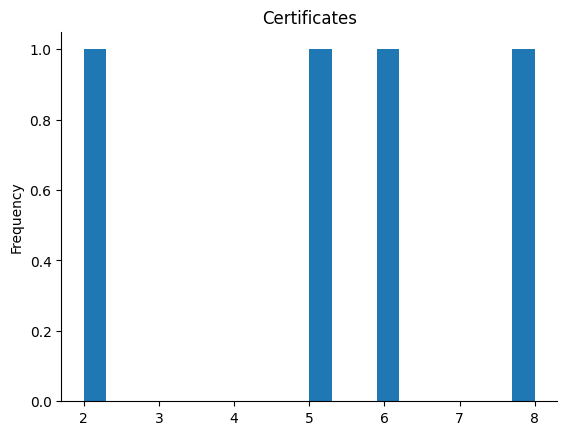

In [69]:
# @title Certificates

from matplotlib import pyplot as plt
certificates_earned['Certificates'].plot(kind='hist', bins=20, title='Certificates')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [70]:
certificates_earned.iloc[2]

,Ahmad
Certificates,5
Time (in months),9


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
